In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = load_digits()
X = mnist.data  # Normalize the data
y = mnist.target

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
residuals = X - X_reconstructed

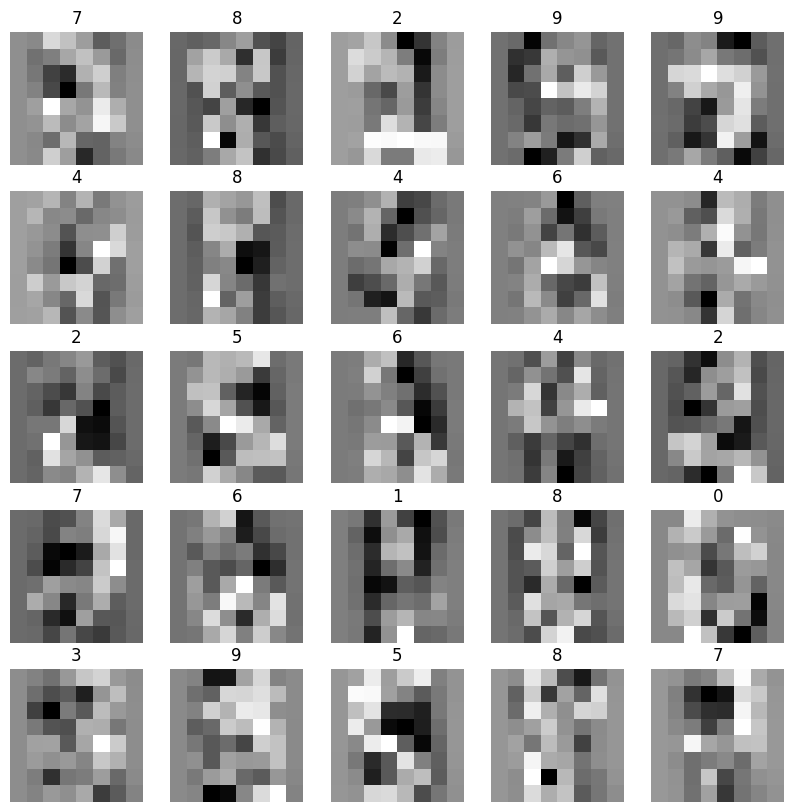

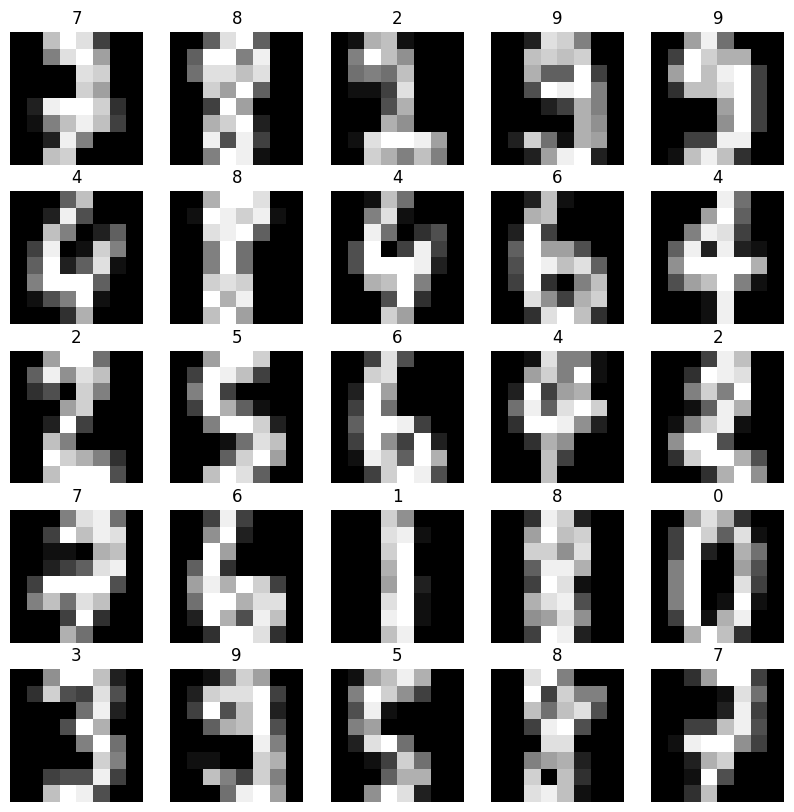

In [5]:
# Visualizing the residuals
def plot_images(images, labels, nrows, ncols,name='residuals.png'):
    plt.figure(figsize=(ncols*2, nrows*2))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.savefig(name,format='png')

# Select a sample of residuals to visualize
sample_size = 100  # Number of images to display
indices = np.random.choice(len(residuals), sample_size, replace=False)
sample_residuals = residuals[indices,:]
sample_labels = y[indices]

plot_images(sample_residuals, sample_labels, 5, 5,name='residuals.png')
plot_images(X[indices,:],y[indices],5,5,name='original.png')